# Introduction to Social Networks

Social network (SN) is a network of individuals (such as friends, acquaintances, and coworkers) connected by interpersonal relationships. This network can be composed not only for people, but also for animals, companies, services, web sites and so on.   
The important components in a social networks is the nodes (the ones who get the relationships) and edges (the relationships).

Nowadays SN has been getting more and more importance and they can be studies by Social network analysis.    

Social network analysis (SNA) is the mapping and measuring of relationships and flows between people, groups, organizations, computers, URLs, and other connected information/knowledge entities. The nodes in the network are the people and groups while the links show relationships or flows between the nodes. SNA provides both a visual and a mathematical analysis of human relationships. It is pretty new the study of this area and the main figures are authors with academic and professional current activity, this talks about the novelty of this area. Social networks are representations of social interactions, with statistical and sociological features.   
SNA applications have reached into such diverse areas as identifying knowledge leaders in organizations, measuring collaboration on teams, illustrating the hidden patterns of terrorism, planning transportation networks, and exploring the paths of disease in public health.   
Many of the models are based not only in statistical models, but also in sociological theories.

# Network Mapping

For the network mapping it was used two APIs of Twitter
* Twitter API
* Tweepy
Twitter API was used for the construction of the network and Tweepy to obtain information about the actors.

In [2]:
#import twitter
import networkx as nx
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline
#from tweepy import OAuthHandler
#from tweepy import API
#from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import sys
import pandas as pd

# Token


CONSUMER_KEY = '******************************'   
CONSUMER_SECRET = '************************************'   
OAUTH_TOKEN = '*********************************************'   
OAUTH_SECRET = '**********************************************'

# Twitter api

For security, it was set sleep_on_rate_limit = True for requests to stop when a limit has been reached and reset after a period.

This limit is imposed by Twitter and depends on the traffic of requests.

api = twitter.Api(consumer_key=CONSUMER_KEY,   
                      consumer_secret=CONSUMER_SECRET,   
                      access_token_key=OAUTH_TOKEN,   
                      access_token_secret=OAUTH_SECRET,   
                 sleep_on_rate_limit=True)

# Tweepy

In the case of tweepy, it was not necessary to establish a delay time, since it was only used to obtain information about the queries.

auth = OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)  
auth.set_access_token(OAUTH_TOKEN, OAUTH_SECRET)  
auth_api = API(auth)

# Dataset of Marvel Universe (Actors)

In [4]:
df=pd.read_csv('MarvelUniverse.csv')
df.head()

,Real Name,Following,Character,Twitter
0,Samuel L. Jackson,869,Nick Fury,@SamuelLJackson
1,Robert Downey Jr,62,Tony Stark,@RobertDowneyJr
2,Paul Bettany,619,vision/jarvis,@Paul_Bettany
3,Tom Holland,98,Peter Parker,@TomHolland1996
4,Chris Evans,508,CaptianAmerica,@ChrisEvans


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Real Name  54 non-null     object
 1   Following  54 non-null     int64 
 2   Character  54 non-null     object
 3   Twitter    54 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [6]:
print("Sum total of friends of the actors",df["Following"].sum(axis = 0) )
#.sum(axis = 0, skipna = True) 

Sum total of friends of the actors 23621


### Information of the actor accounts  through the use of Tweppy

In [113]:
ids=[]
followersCount=[]
followingsCount=[]
for i in df["Twitter"]:
    print("\nGetting data for " + i)
    item = auth_api.get_user(i)
    print("name: " + item.name)
    print("screen_name: " + item.screen_name)
    print("description: " + item.description)
    print("statuses_count: " + str(item.statuses_count))
    print("friends_count: " + str(item.friends_count))
    print("followers_count: ",item.followers_count)
    print("id: ", item.id)
    ids.append(item.id)
    followersCount.append(item.followers_count)
    followingsCount.append(item.friends_count)


Getting data for @SamuelLJackson
name: Samuel L. Jackson
screen_name: SamuelLJackson
description: 
statuses_count: 3547
friends_count: 869
followers_count:  8304646
id:  75974281

Getting data for @RobertDowneyJr
name: Robert Downey Jr
screen_name: RobertDowneyJr
description: You know who I am.
statuses_count: 636
friends_count: 62
followers_count:  14812970
id:  47786101

Getting data for @Paul_Bettany
name: Paul Bettany
screen_name: Paul_Bettany
description: https://t.co/kz61tgLg3H
statuses_count: 4567
friends_count: 619
followers_count:  492189
id:  2796910988

Getting data for @TomHolland1996
name: Tom Holland
screen_name: TomHolland1996
description: 
statuses_count: 1343
friends_count: 98
followers_count:  4872467
id:  624056226

Getting data for @ChrisEvans
name: Chris Evans
screen_name: ChrisEvans
description: 
statuses_count: 1486
friends_count: 589
followers_count:  13545033
id:  580097412

Getting data for @chrishemsworth
name: Chris Hemsworth
screen_name: chrishemsworth
des

name: Linda Cardellini
screen_name: lindacardellini
description: 
statuses_count: 400
friends_count: 245
followers_count:  66903
id:  56181543

Getting data for @Dastmalchian
name: David Dastmalchian
screen_name: Dastmalchian
description: the truth is out there... it’s actually staring us right in the face.  and yet here we are.
statuses_count: 15438
friends_count: 352
followers_count:  14320
id:  115786052

Getting data for @BenicioSource
name: Benicio del Toro
screen_name: BenicioSource
description: First account for news on actor Benicio del Toro #Soldado #TheLastJedi #EscapeAtDannemora
statuses_count: 3903
friends_count: 81
followers_count:  8665
id:  1116555368

Getting data for @OfficialKat
name: Kat Dennings
screen_name: OfficialKat
description: Detritus
statuses_count: 4672
friends_count: 620
followers_count:  1120877
id:  23544268

Getting data for @missjudygreer
name: judy greer
screen_name: missjudygreer
description: that girl from that movie/tv show (and author!) #idontknow

In [114]:
for i in range(len(df)):
    print("Id ", ids[i], "\tFollowers: ",followersCount[i], "\tFollowing: ",
          followingsCount[i],"\tReal Name: ",df["Real Name"][i])

Id  75974281 	Followers:  8304646 	Following:  869 	Real Name:  Samuel L. Jackson
Id  47786101 	Followers:  14812970 	Following:  62 	Real Name:  Robert Downey Jr
Id  2796910988 	Followers:  492189 	Following:  619 	Real Name:  Paul Bettany
Id  624056226 	Followers:  4872467 	Following:  98 	Real Name:  Tom Holland
Id  580097412 	Followers:  13545033 	Following:  589 	Real Name:  Chris Evans
Id  3063032281 	Followers:  6757678 	Following:  109 	Real Name:  Chris Hemsworth
Id  183404455 	Followers:  165330 	Following:  17 	Real Name:  Scarlett Johansson
Id  285282053 	Followers:  2892742 	Following:  189 	Real Name:  Gwyneth Paltrow
Id  228794007 	Followers:  824942 	Following:  351 	Real Name:  Don Cheadle
Id  22677790 	Followers:  2206747 	Following:  225 	Real Name:  Jon Favreau
Id  391037985 	Followers:  4244612 	Following:  1330 	Real Name:  Tom Hiddleston
Id  47285504 	Followers:  6430451 	Following:  1849 	Real Name:  Mark Ruffalo
Id  555448499 	Followers:  893808 	Following:  14

In [117]:

for i in range(len(df)):
    followers = []
    # Load data
    followers.extend(api.GetFriendIDs(user_id=ids[i]))
    # Create graph
    print(df["Real Name"][i])
    for user in followers:
        track=0
        for match in ids:
            if (user==match):
                Graph.add_edge(df["Real Name"][i],df["Real Name"][track])
            track+=1
    time.sleep(90)

Samuel L. Jackson
Robert Downey Jr
Paul Bettany
Tom Holland
Chris Evans
Chris Hemsworth
Scarlett Johansson
Gwyneth Paltrow
Don Cheadle
Jon Favreau
Tom Hiddleston
Mark Ruffalo
Cobie Smulders
Anthony Mackie
Jeremy Renner
Dave Bautista
Chadwick Boseman
Benedict Cumberbatch
Karen Gillan
Clark Gregg
Idris Elba
Stan Lee
Sean Gunn
chris pratt
Paul Rudd
Zoe Saldana
ASANO TADANOBU
Winston Duke
Danai Gurira
Anthony Hopkins
Pom Klementieff
Evangeline Lilly
Benedict Wong
Letitia Wright
Angela Bassett
Leslie Bibb
Linda Cardellini
David Dastmalchian
Benicio del Toro
Kat Dennings
Judy Greer
Djimon Hounsou
Brie Larson
Zachary Levi
Ross Marquand
Lee Pace
Abby Ryder Fortson
Andy Serkis
Garry Shandling
Ty Simpkins
Tessa Thompson
Emily VanCamp
Taika Waititi
Jeff Bridges


Save the nodes and edges in Json, this is because the gathering of this information can take long time

In [8]:
import json

from networkx.readwrite import json_graph
Graph=nx.DiGraph()
data1 = json_graph.node_link_data(Graph)
#H = nx.gn_graph(377)
data2 = json_graph.node_link_data(Graph, {'link': 'links', 'source': 'source', 'target': 'target'})

del data2['directed']
del data2['multigraph']
del data2['graph']
with open('dataUPYDAY.json', 'w') as fp:
    json.dump(data2, fp)

In [ ]:
s1 = json.dumps(data1)
s2 = json.dumps(data2, default={'link': 'edges', 'source': 'from', 'target': 'to'})

# Load the Json file to create the graph

In [12]:
import json
from networkx.readwrite import json_graph
fileName="dataUPYDAY.json"

def read_json_file(fileName):
    with open(fileName) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)

graph = read_json_file(fileName)

In [13]:
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 51
Number of edges: 627
Average in degree:  12.2941
Average out degree:  12.2941


In [14]:
inDegree = [150*(val+1) for (node, val) in graph.in_degree()]
outDegree = [150*(val+1) for (node, val) in graph.out_degree()]

## InDegre Visualization

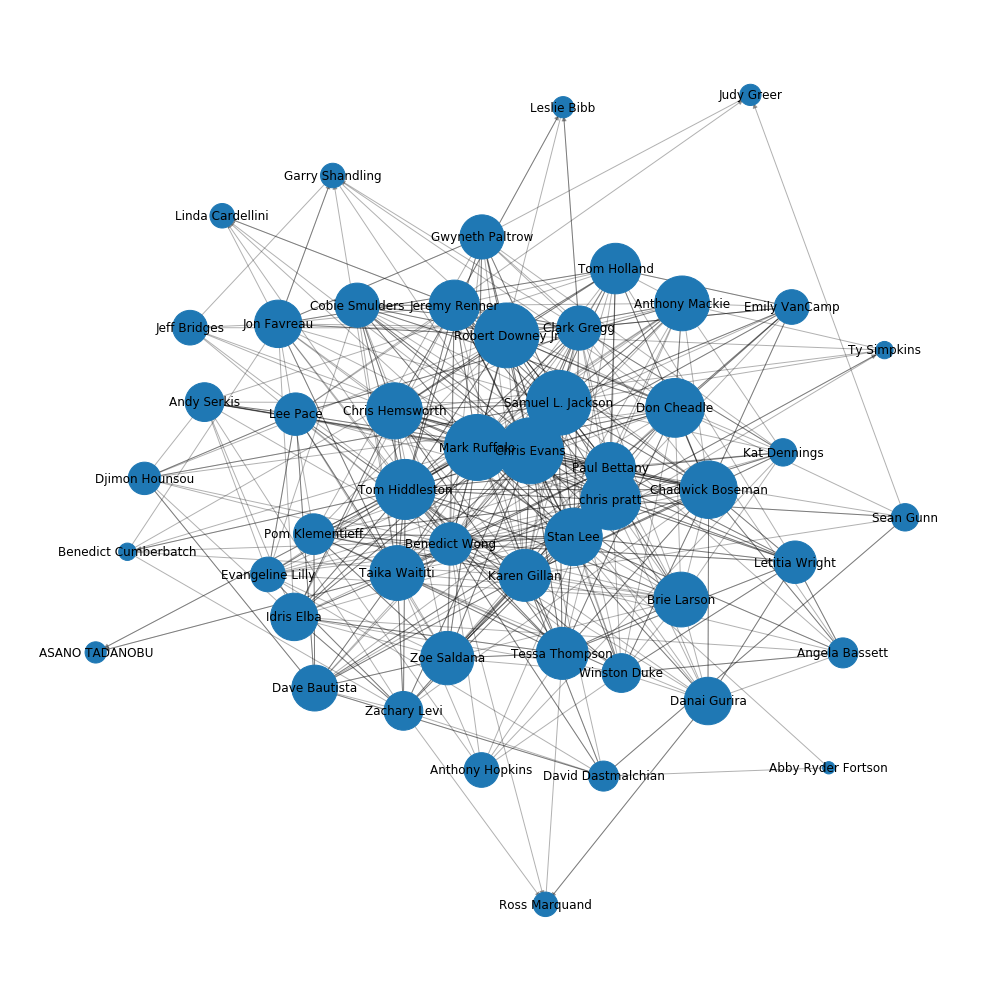

In [15]:
import time
#Graph=nx.DiGraph()  # Establecer un grafo

plt.figure(figsize=(14,14))
# Layout
pos=nx.kamada_kawai_layout(graph)
#Drawing in plt using nx

u=nx.draw_networkx_nodes(graph, pos, node_size=inDegree, with_labels=True, cmap=plt.cm.viridis)
i=nx.draw_networkx_edges(graph, pos, alpha=0.3)
nx.draw_networkx_labels(graph,pos)


#nx.draw_networkx(graph, pos, with_labes=True)
plt.axis('off')
plt.tight_layout()
#plt.savefig('network.png')

# OutDegree Visualization

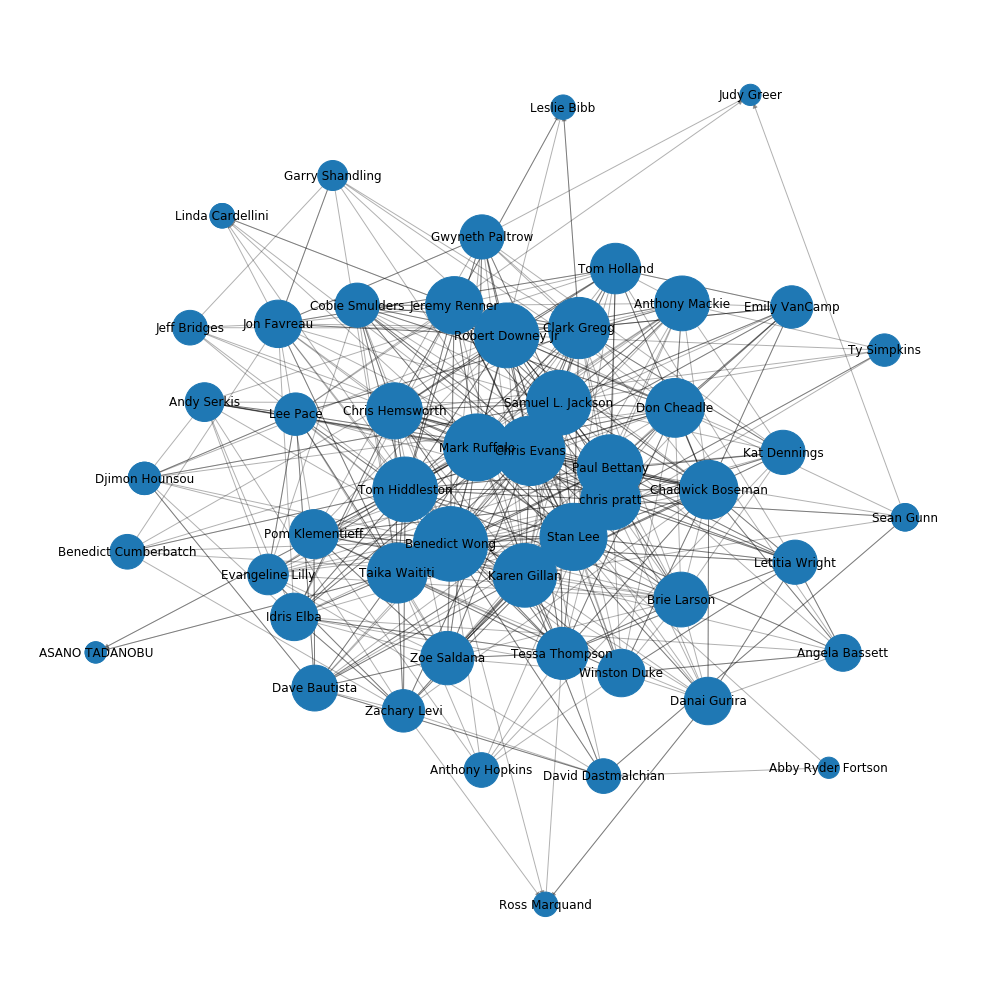

In [16]:
plt.figure(figsize=(14,14))
# Layout
pos=nx.kamada_kawai_layout(graph)
#Drawing in plt using nx

u=nx.draw_networkx_nodes(graph, pos, node_size=outDegree, with_labels=True, cmap=plt.cm.viridis)
i=nx.draw_networkx_edges(graph, pos, alpha=0.3)
nx.draw_networkx_labels(graph,pos)

nx.draw_networkx_nodes(graph, pos, arrows=True, node_size=inDegree, with_labels=True)

plt.axis('off')
plt.tight_layout()


In [17]:
print("The node with highest degree is " ,max(dict(graph.degree()).items(), key = lambda x : x[1]))

The node with highest degree is  ('Chris Evans', 59)


# Centrality Measures

Individual network centralities provide insight into the individual's location in the network. The relationship between the centralities of all nodes can reveal much about the overall network structure.   

A very centralized network is dominated by one or a few very central nodes. If these nodes are removed or damaged, the network quickly fragments into unconnected sub-networks. A highly central node can become a single point of failure. A network centralized around a well connected hub can fail abruptly if that hub is disabled or removed. Hubs are nodes with high degree and betweeness centrality.   

A less centralized network has no single points of failure. It is resilient in the face of many intentional attacks or random failures -- many nodes or links can fail while allowing the remaining nodes to still reach each other over other network paths. Networks of low centralization fail gracefully.   



* Degree Centrality: Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity. It tells us how many direct, ‘one hop’ connections each node has to other nodes in the network. It is used for finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.  


* Closeness Centrality: It scores each node based on their ‘closeness’ to all other nodes in the network. Closeness centrality can help find good ‘broadcasters’, but in a highly-connected network, you will often find all nodes have a similar score. What may be more useful is using Closeness to find influencers in a single cluster. This measure calculates the shortest paths between all nodes, then assigns each node a score based on its sum of shortest paths. It helps us for finding the individuals who are best placed to influence the entire network most quickly.


* Betweenness centrality: It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. It was introduced as a measure for quantifying the control of a human on the communication between other humans in a social network by Linton Freeman. Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters. This measure shows which nodes are ‘bridges’ between nodes in a network. It does this by identifying all the shortest paths and then counting how many times each node falls on one. It is useful for finding the individuals who influence the flow around a system.


* PageRank: It is a variant of EigenCentrality, also assigning nodes a score based on their connections, and their connections’ connections. The difference is that PageRank also takes link direction and weight into account – so links can only pass influence in one direction, and pass different amounts of influence. PageRank is famously one of the ranking algorithms behind the original Google search engine (the ‘Page’ part of its name comes from creator and Google founder, Sergei Brin). This measure uncovers nodes whose influence extends beyond their direct connections into the wider network. PageRank can be helpful for understanding citations and authority.


In [19]:
import collections
from operator import itemgetter

degree = nx.degree_centrality(graph)
SortedDC = sorted(degree.items(), key=itemgetter(1), reverse=True)

print("The most important nodes for degree centrality:")
for i,n in SortedDC[:4]:
    print("Node",i,"\tDegree centrality:%.4f"%n)

The most important nodes for degree centrality:
Node Chris Evans 	Degree centrality:1.1800
Node Mark Ruffalo 	Degree centrality:1.1400
Node Stan Lee 	Degree centrality:1.0000
Node Tom Hiddleston 	Degree centrality:1.0000


In [21]:
Ccentrality = nx.closeness_centrality(graph)
SortedCC = sorted(Ccentrality.items(), key=itemgetter(1), reverse=True)

print("The most important nodes for closeness centrality:")
for n,cc in SortedCC[:5]:
    print("Node",n, "\tCloseness Centrality %.4f"%cc)

The most important nodes for closeness centrality:
Node Chris Evans 	Closeness Centrality 0.6776
Node Mark Ruffalo 	Closeness Centrality 0.6776
Node Samuel L. Jackson 	Closeness Centrality 0.6678
Node Robert Downey Jr 	Closeness Centrality 0.6583
Node Tom Hiddleston 	Closeness Centrality 0.6312


In [22]:
SortedBC = sorted(nx.betweenness_centrality(graph).items(), key=itemgetter(1), reverse=True)

print("The most important nodes for betweenness centrality:")
for n,bwc in SortedBC[:5]:
    print("Node",n, "\tBetweenness Centrality %.4f"%bwc)


The most important nodes for betweenness centrality:
Node Mark Ruffalo 	Betweenness Centrality 0.0904
Node Chris Evans 	Betweenness Centrality 0.0798
Node Tom Hiddleston 	Betweenness Centrality 0.0751
Node chris pratt 	Betweenness Centrality 0.0596
Node Stan Lee 	Betweenness Centrality 0.0576


In [23]:
pr = nx.pagerank(graph, alpha=0.85)
SortedPR = sorted(pr.items(), key=itemgetter(1), reverse=True)
print("The most important nodes for Page Rank:")

for n,EC in SortedPR[:5]:
    print("Node",n, "\tPageRank %.4f"%EC)

The most important nodes for Page Rank:
Node Mark Ruffalo 	PageRank 0.0492
Node Chris Evans 	PageRank 0.0483
Node Samuel L. Jackson 	PageRank 0.0438
Node Robert Downey Jr 	PageRank 0.0407
Node Don Cheadle 	PageRank 0.0373


In [24]:
from pandas import DataFrame
b=nx.closeness_centrality(graph)
c=nx.betweenness_centrality(graph)
a=nx.degree_centrality(graph)
pr=nx.pagerank(graph, alpha=0.85)

av=list(a.values())
bv=list(b.values())
cv=list(c.values())
prv=list(pr.values())
nodes=list(a.keys())

Table = {'Node': nodes, 'Degree': av, 'Closeness': bv, 'Betweenness': cv,'PageRank':prv}
df = DataFrame(Table,columns= ['Node','Degree', 'Closeness', 'Betweenness','PageRank'])
df = df.sort_values(['Closeness','Degree','Betweenness'], ascending=False)

df.head(10)

,Node,Degree,Closeness,Betweenness,PageRank
13,Chris Evans,1.18,0.677647,0.079785,0.048260
18,Mark Ruffalo,1.14,0.677647,0.090371,0.049181
0,Samuel L. Jackson,0.92,0.667826,0.039749,0.043820
12,Robert Downey Jr,0.84,0.658286,0.023688,0.040744
15,Tom Hiddleston,1.00,0.631233,0.075090,0.035220
19,Don Cheadle,0.66,0.622703,0.016380,0.037324
21,chris pratt,0.88,0.614400,0.059593,0.030496
10,Stan Lee,1.00,0.606316,0.057598,0.027286
4,Chadwick Boseman,0.86,0.606316,0.027129,0.033073
7,Chris Hemsworth,0.74,0.598442,0.012326,0.029367


# Network Models

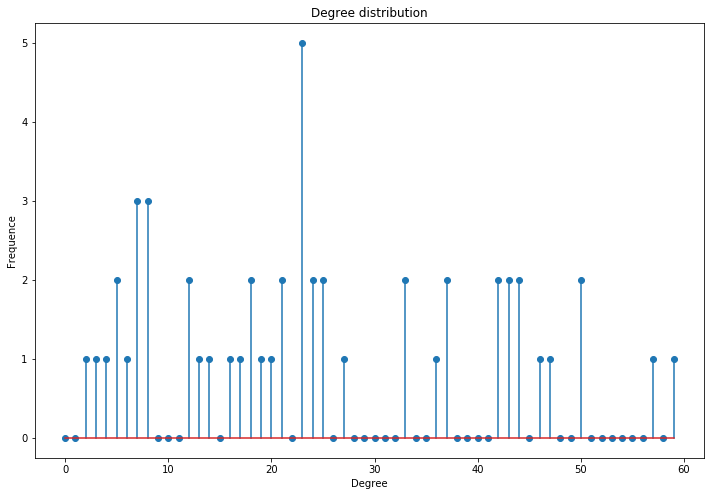

In [18]:
import numpy as np

# Degree Distribution (10 pts)
degree_freq = np.array(nx.degree_histogram(graph))
plt.figure(figsize=(12, 8))
plt.stem(degree_freq)
plt.title("Degree distribution")
plt.ylabel("Frequence")
plt.xlabel("Degree")

plt.show()


The distribution of the graph shows the aspect of a radom model, this can be due to we did not kept all the edge, we filtered the edges for 